# Team Mini Project 2: CAPO and Time to Clinical Stability
## Team: TheDataKnights
## Team Members: Nicholas Romano, Michael Zelaya
## DS450-01
## Data Science Senior Capstone 
---

### Importing Libraries and Reading in Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, r2_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("capo_data.csv")
df

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,1,1,1,1
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,21706,27.0,1.0,NaN,NaN,166.0,64.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8226,21707,36.0,0.0,0.0,NaN,153.0,72.0,134.0,30.0,126.0,...,0,0,0,0,0,0,0,0,0,0
8227,21708,59.0,1.0,NaN,NaN,170.0,70.0,77.0,18.0,130.0,...,0,0,0,0,0,0,0,0,0,0
8228,21709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


---
### Dataset Infomation

The current dataset has 8230 entries and 100 columns. Using the .info() method we noticed two things: (1) that there are no values representing the Time to Clinical Stability (TCS), Early/Late TCS, or whether Stability was reached - the dataset just contains the daily records of whether the patient met the criteria to become stable for each day; (2) and that there are a wide range of varying numbers for the non-null counts of the columns.  

The solution for the three needed TCS columns was to create 3 columns: a Time to Clinical Stability, a Early/Late Stability, and a Stability Reached column. 
- The Time-to-Clinical Stability (TCS) column represents the number of days for the patient to reach clinical stability. This column was created by iterating through the daily evalutations done on each patient to see if the pateint had reached clinical stability. The day the patient reached clincial stability was stored in the `TCS` column.
- We also considered whether or not the patient reached early stability, which was if the time clinical stability was less than 4 days. If the TCS value was less than four days a 1 was placed into a column named `Early_TCS`, otherwise a 0 was placed to represent the patient not reaching early clincal stability.
- We also added a column for whether the patient reached clinical stability, which would be if the patient reached clincal stability on day 7 or before. If the patient reached clinical stability on day 7 or before the `stability reached` value would be 1, otherwise the value entered would be one. 

The solution to the columns having a wide range of differing non-null values was creating the functions `missingValues()` and `columnReport()`, which in turn gives us more insight into the data makeup of each column. 
- The `missingValues()` function takes in a column name and returns the number of missing values within the column passed into the parameter list. 
- The `columnReport()` takes in the column name and returns a string that contains information pertaining to the columns missing value count and the percentage of entries within the column that are missing. 

#### Dataset Details [Shape, Info]

In [3]:
#Shape method provides a tuple representing (the number of rows, the number of columns)
df.shape

(8230, 100)

In [4]:
#.info method provides a report of the columns including: column name, non-null count, and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_id                  8230 non-null   int64  
 1   dem_age                  8223 non-null   float64
 2   dem_sex                  8226 non-null   float64
 3   dem_pregnant             894 non-null    float64
 4   dem_trimester            19 non-null     float64
 5   exam_height              3213 non-null   float64
 6   exam_weight              3303 non-null   float64
 7   exam_hr                  5105 non-null   float64
 8   exam_rr                  3099 non-null   float64
 9   exam_sbp                 3623 non-null   float64
 10  exam_dbp                 3620 non-null   float64
 11  exam_temp                5113 non-null   float64
 12  exam_o2sat               3727 non-null   float64
 13  exam_o2satvalue          3444 non-null   float64
 14  exam_fio2              

#### Adding Time to Clinical Stability Columns

**Adding columns named `TCS`, `Early_TCS`, and `Stability Reached` at the end of the dataset. `TCS` will contain the Time to Clinical Stability of the given patient, represented as number of days that the given patient took to reach clinical stability. `Early_TCS` will contain a binary variable representing whether or not the patient reaches clinical stability in less than 4 days. `Stability Reached` will contain a binary variable representing whether or not the patient had reached clincal stability by day 7 or earlier.**

- We used an if-elif-else statement nested within a for loop to determine the number of days it took each patient to reach clinical stability. The nested if-elif-else statement does this by checking on what day the patient met all four criteria categories of coughing, temperature, wbc, and oral intake. If all the values are met (represented by a 1), the particular day all four values were one was stored in the `TCS` column. However, we noticed that there were a number of patients that were deemed clinical stable on day 0 but patients cannot be clinically stable on day 0. The solution we deemed appropriate was to drop the entires were TCS == 0. As iterated through the dataset, we collected and stored all the index values where TCS equal to 0 into a list which in turn gaves us the index values that were needed to be dropped.
- For the `Early_TCS` column, we used an if-else statement nested within a for loop. The for loop iterates over the indexes and chnages the value within the `Early_TCS` column to a 1 if the patient reached clinical stability in less than 4 days, otherwise a 0 was entered into the `Early_TCS` column to represent the patient reached clincal stability in 4 days or more.
- Likewise for the `Stability Reached` column, we used an if-else statement nested within a for loop. The for loop iterates over the indexes within the dataframe and the value in the `Stability Reached` column is chaged to a 1 if the patiend had reached clinical stability before day 8 and the value is left as 0 if the patient reached clincal stability on day 8 or later. 

**Inserting Columns to the end of the dataframe**

In [5]:
df.insert(100, "TCS", 0)
df.insert(101, "Early_TCS", 0)
df.insert(102, "Stability_Reached", 0)

**TCS column if-elif-else statement nested withn a for loop to update the values in the TCS column. The concerning_TCS_Index_List stores the index values for index values with a patient who was reported as being clinical stable on day 0. These index values will end up being dropped.**

In [6]:
#concerning_TCS_index_List is used to store and later drop TCS values of 0.
concerning_TCS_Index_List = []

#if-elif-else nested within a for loop to obtain the TCS value for each row
for index in df.index:
    if ((df.day0test___cough.iat[index] == 1) and (df.day0test___afebrile.iat[index] == 1) and (df.day0test___wbc.iat[index] == 1) and (df.day0test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 0
        concerning_TCS_Index_List.append(index)
    
    elif ((df.day1test___cough.iat[index] == 1) and (df.day1test___afebrile.iat[index] == 1) and (df.day1test___wbc.iat[index] == 1) and (df.day1test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 1
        
    elif ((df.day2test___cough.iat[index] == 1) and (df.day2test___afebrile.iat[index] == 1) and (df.day2test___wbc.iat[index] == 1) and (df.day2test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 2
        
    elif ((df.day3test___cough.iat[index] == 1) and (df.day3test___afebrile.iat[index] == 1) and (df.day3test___wbc.iat[index] == 1) and (df.day3test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 3
        
    elif ((df.day4test___cough.iat[index] == 1) and (df.day4test___afebrile.iat[index] == 1) and (df.day4test___wbc.iat[index] == 1) and (df.day4test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 4
    
    elif ((df.day5test___cough.iat[index] == 1) and (df.day5test___afebrile.iat[index] == 1) and (df.day5test___wbc.iat[index] == 1) and (df.day5test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 5
    
    elif ((df.day6test___cough.iat[index] == 1) and (df.day6test___afebrile.iat[index] == 1) and (df.day6test___wbc.iat[index] == 1) and (df.day6test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 6
        
    elif ((df.day7test___cough.iat[index] == 1) and (df.day7test___afebrile.iat[index] == 1) and (df.day7test___wbc.iat[index] == 1) and (df.day7test___oral.iat[index] == 1)):
        df.TCS.iat[index] = 7
        
    elif ((df.over7daytest___cough.iat[index] == 1) and (df.over7daytest___afebrile.iat[index] == 1) and (df.over7daytest___wbc.iat[index] == 1) and (df.over7daytest___oral.iat[index] == 1)):
        df.TCS.iat[index] = 8
    
    else:
        df.TCS.iat[index] = 0
        concerning_TCS_Index_List.append(index)

**If-Else statement nested within a for loop to interate through all the rows and update the entry within the `Early_TCS` column to indicate whether or not the patient reached clinical stability before day 4**

In [7]:
for index in df.index:
    if (df.TCS.iat[index] < 4):
        df.Early_TCS.iat[index] = 1
    else:
        df.Early_TCS.iat[index] = 0

**If-Else Statement within a for loop to interate through all the rows and update the entry within the `Stability_Reached` column to indicate whether or not the patient reached clinical stability before eight days**

In [8]:
for index in df.index:
    if (df.TCS.iat[index] < 8):
        df.Stability_Reached.iat[index] = 1
    else:
        df.Stability_Reached.iat[index] = 0

#### Dropping rows that show a 0 with in the TCS column.
Using a function called `valueCountFrequency` to see the value counts and their corresponding proportions. This allows us to check to see if there are any values in the TCS column with a 0.

In [9]:
def valueCountFrequency(colName):
    countData = df[f"{colName}"].value_counts() #Retrieving Value Count Data
    countFrequency = df[f"{colName}"].value_counts(normalize = True) #Retrieving Value Frequency Data
    data = pd.concat([countData, countFrequency], axis = 1) #Combining the Value Count and Frequency Data
    data.reset_index(inplace=True) #Reseting Index of combined datasets
    data.rename(columns = {'count':'Value Count','proportion': 'Value Percentage',
                           f'{colName}': f'{colName}'}, inplace = True) #Renaming Columns to be colName, Value Count and Value Percentage

    #Chaning Value Proportion to a percentage
    for indexValue in data.index:
        data.loc[indexValue, 'Value Percentage'] = data.loc[indexValue, 'Value Percentage']*100
    
    return data

In [10]:
#Displaying the Time to Clinical Stability Values to check the output of the previous blocks of code
TCS = valueCountFrequency('TCS')
TCS

,TCS,Value Count,Value Percentage
0,8,1774,21.555286
1,3,1150,13.973269
2,2,1135,13.791009
3,0,1095,13.304982
4,4,990,12.029162
5,5,695,8.444714
6,1,645,7.837181
7,6,397,4.823815
8,7,349,4.240583


In [11]:
#Dropping the indexes within the concerning_TCS_Index_List that contains the indexes with a time to clinical stability of 0. 
#A time to clinical stability doesn't make sense. We elected to drop them. 
df.drop(concerning_TCS_Index_List, inplace = True)

#Reseting index to account for the dropped rows
df.reset_index(drop=True, inplace = True)

#Checking the updated TCS value_counts to check and see if all TCS values of 0 were removed
updatedTCS = valueCountFrequency('TCS')
updatedTCS

,TCS,Value Count,Value Percentage
0,8,1774,24.863350
1,3,1150,16.117730
2,2,1135,15.907498
3,4,990,13.875263
4,5,695,9.740715
5,1,645,9.039944
6,6,397,5.564121
7,7,349,4.891381


#### Droping the daily patient stability test columns 
The daily patient stability test columns were only used to calculate the values within the Time to Clinical Stability, Early Stability, and Stability Reached  columns. We see no further need to keep the daily stability evaluation columns.

In [12]:
#Dropping the TCS evaluation columns since we only needed them to create the TCS and Early_TCS columns
df.drop(columns = ['day0test___cough', 'day0test___afebrile', 'day0test___wbc', 'day0test___oral',
                   'day1test___cough', 'day1test___afebrile', 'day1test___wbc', 'day1test___oral', 
                   'day2test___cough', 'day2test___afebrile', 'day2test___wbc', 'day2test___oral', 
                   'day3test___cough', 'day3test___afebrile', 'day3test___wbc', 'day3test___oral', 
                   'day4test___cough', 'day4test___afebrile', 'day4test___wbc', 'day4test___oral', 
                   'day5test___cough', 'day5test___afebrile', 'day5test___wbc', 'day5test___oral', 
                   'day6test___cough', 'day6test___afebrile', 'day6test___wbc', 'day6test___oral', 
                   'day7test___cough', 'day7test___afebrile', 'day7test___wbc', 'day7test___oral', 
                   'over7daytest___cough', 'over7daytest___afebrile', 'over7daytest___wbc', 'over7daytest___oral'],
        axis = 1, inplace = True)

---
### Data Cleaning - Dealing with Missing Data

As mentioned earlier, the `missingValues()` and `columnReport()` functions are used to help gain more insight into the makeup of each column 
- The `missingValues()` function takes in a column name and returns the number of missing values within the column passed into the parameter list. 
- The `columnReport()` takes in the column name and returns a string that contains information pertaining to the columns missing value count and the percentage of entries within the column that are missing. 

#### Creating `missingValues()` and `columnReport()` functions

In [13]:
def missingValues(column):
    na_values = df[f"{column}"].isna().sum()
    return na_values

In [14]:
def columnReport(colName):
    report = f" Column Name: {colName} \
    \n Missing Values: {missingValues(colName)}\
    \n Missing Value Percentage: {((missingValues(colName))/len(df[colName]))*100}% \n"
    
    return report

#### Printing out the columnReport for the columns within the dataframe

Printing the columnReport for each column enables us to see the percent of missing values within each column. Doing so allows us to determine if the missing value percentage is at a reasonable level to impute a value for the missing values within the column.

The columns with a high percentage of missing values include:

- dem_pregnant, dem_trimesterm,
- exam_height, exam_weight, exam_hr, exam_rr, exam_sbp, exam_dbp, exam_temp, exam_o2sat, exam_o2satvalue, exam_fio2,
- lab_hematocrit, ab_hemoglobin, lab_wbc, lab_bands, lab_platelets, lab_inr, lab_na, lab_k, lab_bun,
- lab_creatinine, lab_bicarb, lab_glucose, lab_albumin, lab_ast, lab_alt, lab_bilirubin,
- lab_trop1, lab_trop2, lab_trop3, lab_ckmb1, lab_ckmb2, lab_ckmb3, lab_ldl, lab_hdl,
- lab_cholesterol, lab_triglycerides, lab_lactate, lab_hga1c, lab_ldh, lab_bnp, lab_crp, lab_pct, lab_vitamind,
- lab_abg, lab_abgph, lab_abgpaco2, lab_abgpao2, lab_abgbicarb, lab_abgfio2,
- cx_rul, cx_rml, cx_db, cx_du,

In [15]:
for colName in df.columns:
    print(columnReport(colName))

 Column Name: case_id     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: dem_age     
 Missing Values: 4    
 Missing Value Percentage: 0.05606166783461808% 

 Column Name: dem_sex     
 Missing Values: 1    
 Missing Value Percentage: 0.01401541695865452% 

 Column Name: dem_pregnant     
 Missing Values: 6394    
 Missing Value Percentage: 89.61457603363701% 

 Column Name: dem_trimester     
 Missing Values: 7117    
 Missing Value Percentage: 99.74772249474422% 

 Column Name: exam_height     
 Missing Values: 4442    
 Missing Value Percentage: 62.256482130343386% 

 Column Name: exam_weight     
 Missing Values: 4357    
 Missing Value Percentage: 61.065171688857745% 

 Column Name: exam_hr     
 Missing Values: 2528    
 Missing Value Percentage: 35.43097407147863% 

 Column Name: exam_rr     
 Missing Values: 4366    
 Missing Value Percentage: 61.19131044148563% 

 Column Name: exam_sbp     
 Missing Values: 3947    
 Missing Value Percentage: 55.31885

#### Checking which rows to drop

However before considering which columns to drop, we wanted to check for rows to drop. Rows with large amounts of missing data could affect the missing value percentages. Opening the original CAPO_data.csv file in excel, we noticed that most of the rows were missing a large portion of the data until row number 4538, which corresponds to case_ID of 5231. We decided to drop the entries with case_id values under 5232, then re-evaluate the column missing percentages. 

**Dropping rows with case_id values less thatn 5322. Entries after this row see more consistent record keeping. So we elected to remove the less consistent records above**

In [16]:
missingIndexList = df[df["case_id"] < 5232].index.tolist()
df.drop(missingIndexList, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,TCS,Early_TCS,Stability_Reached
0,5232,64.0,1.0,NaN,NaN,185.0,68.0,98.0,22.0,134.0,...,1.0,0.0,1.0,NaN,NaN,0.0,0.0,3,1,1
1,5233,56.0,1.0,NaN,NaN,173.0,54.0,96.0,24.0,102.0,...,0.0,0.0,1.0,NaN,NaN,0.0,2.0,6,0,1
2,5234,68.0,1.0,NaN,NaN,185.0,153.0,69.0,20.0,149.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,3,1,1
3,5235,48.0,1.0,NaN,NaN,168.0,66.0,140.0,20.0,144.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,2,1,1
4,5236,49.0,1.0,NaN,NaN,183.0,134.0,100.0,20.0,164.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,21700,49.0,1.0,NaN,NaN,170.0,90.0,100.0,45.0,126.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0,0
3234,21701,63.0,1.0,NaN,NaN,168.0,70.0,65.0,25.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,0
3235,21704,78.0,1.0,NaN,NaN,168.0,58.0,120.0,NaN,128.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0,1
3236,21705,61.0,0.0,0.0,NaN,NaN,NaN,86.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1


**Rerunning the column report to see the missing value percentages for the columns for the rows with consistent record keeping**

In [17]:
for colName in df.columns:
    print(columnReport(colName))

 Column Name: case_id     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: dem_age     
 Missing Values: 4    
 Missing Value Percentage: 0.12353304508956146% 

 Column Name: dem_sex     
 Missing Values: 1    
 Missing Value Percentage: 0.030883261272390366% 

 Column Name: dem_pregnant     
 Missing Values: 2497    
 Missing Value Percentage: 77.11550339715873% 

 Column Name: dem_trimester     
 Missing Values: 3220    
 Missing Value Percentage: 99.44410129709698% 

 Column Name: exam_height     
 Missing Values: 970    
 Missing Value Percentage: 29.956763434218654% 

 Column Name: exam_weight     
 Missing Values: 885    
 Missing Value Percentage: 27.33168622606547% 

 Column Name: exam_hr     
 Missing Values: 54    
 Missing Value Percentage: 1.6676961087090798% 

 Column Name: exam_rr     
 Missing Values: 478    
 Missing Value Percentage: 14.762198888202594% 

 Column Name: exam_sbp     
 Missing Values: 62    
 Missing Value Percentage: 1.91476219888

#### Dropping Values with high percentage of missing values

**Dropping Columns with a large percentage of missing values**    
The columns that we ended up dropping include:    
- `case_id` - dropped becuase each `case_id` is a unique value assigned to each record entered into the daraframe. Since the index already is a unique value for each entry/row, we saw no need in keeping the `case_id` and index. We elected to drop the `case_id` column.
- `dem_pregnant` and `dem_trimester` - dropped these two columns becuase these columns have a very high percentage of missing data and also these columns apply only to the female patients. With the high percentage of missing values and being only applicable to % of the patients, we elected to drop these columns.
- The following columns were dropped due to have high percentages of missing values of their total value. Threshold of high percentage of missing values was above 30%, since imputing values of 30%+ missing values increases the change of introducing bias int the models later on:     
-- `exam_fio2`, `exam_o2sat`, `exam_o2satvalue`, `lab_inr`, `lab_bicarb`, `lab_albumin`, `lab_ast`, `lab_alt`, `lab_bilirubin`,    
-- `lab_trop1`,`lab_trop2`,`lab_trop3`,`lab_ckmb1`,`lab_ckmb2`,`lab_ckmb3`,    
-- `lab_ldl`,`lab_hdl`,`lab_cholesterol`,`lab_triglycerides`,`lab_lactate`,`lab_hga1c`, `lab_ldh`, `lab_bnp`, `lab_crp`, `lab_pct`, `lab_vitamind`,    
-- `lab_abgph`, `lab_abgpaco2`, `lab_abgpao2`, `lab_abgbicarb`, `lab_abgfio2`, `lab_bands`

In [18]:
df.drop(["case_id", "dem_pregnant", "dem_trimester", "exam_fio2",
         "lab_inr", "lab_bicarb", "lab_albumin",
         "lab_ast", "lab_alt", "lab_bilirubin",
         "lab_trop1", "lab_trop2", "lab_trop3", 
         "lab_ckmb1", "lab_ckmb2", "lab_ckmb3",
         "lab_ldl", "lab_hdl","lab_cholesterol", 
         "lab_triglycerides", "lab_lactate",
         "lab_hga1c", "lab_ldh", "lab_bnp", "lab_crp",
         "lab_pct", "lab_vitamind",
         "lab_abgph", "lab_abgpaco2",
         "lab_abgpao2", "lab_abgbicarb",
         "lab_abgfio2", "lab_bands",
         "exam_o2sat", "exam_o2satvalue"], axis =1, inplace = True)

df

,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_mental,...,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,TCS,Early_TCS,Stability_Reached
0,64.0,1.0,185.0,68.0,98.0,22.0,134.0,53.0,36.7,0.0,...,1.0,0.0,1.0,NaN,NaN,0.0,0.0,3,1,1
1,56.0,1.0,173.0,54.0,96.0,24.0,102.0,56.0,37.2,0.0,...,0.0,0.0,1.0,NaN,NaN,0.0,2.0,6,0,1
2,68.0,1.0,185.0,153.0,69.0,20.0,149.0,52.0,38.9,0.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,3,1,1
3,48.0,1.0,168.0,66.0,140.0,20.0,144.0,81.0,38.9,0.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,2,1,1
4,49.0,1.0,183.0,134.0,100.0,20.0,164.0,98.0,36.7,0.0,...,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,49.0,1.0,170.0,90.0,100.0,45.0,126.0,76.0,36.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0,0
3234,63.0,1.0,168.0,70.0,65.0,25.0,130.0,92.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,0
3235,78.0,1.0,168.0,58.0,120.0,NaN,128.0,87.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0,1
3236,61.0,0.0,NaN,NaN,86.0,NaN,NaN,NaN,NaN,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1


#### Data Imputation - Replacing Missing Data

**Checking the columnReport of the remaining columns**

In [19]:
for colName in df.columns:
    print(columnReport(colName))

 Column Name: dem_age     
 Missing Values: 4    
 Missing Value Percentage: 0.12353304508956146% 

 Column Name: dem_sex     
 Missing Values: 1    
 Missing Value Percentage: 0.030883261272390366% 

 Column Name: exam_height     
 Missing Values: 970    
 Missing Value Percentage: 29.956763434218654% 

 Column Name: exam_weight     
 Missing Values: 885    
 Missing Value Percentage: 27.33168622606547% 

 Column Name: exam_hr     
 Missing Values: 54    
 Missing Value Percentage: 1.6676961087090798% 

 Column Name: exam_rr     
 Missing Values: 478    
 Missing Value Percentage: 14.762198888202594% 

 Column Name: exam_sbp     
 Missing Values: 62    
 Missing Value Percentage: 1.9147621988882024% 

 Column Name: exam_dbp     
 Missing Values: 64    
 Missing Value Percentage: 1.9765287214329834% 

 Column Name: exam_temp     
 Missing Values: 189    
 Missing Value Percentage: 5.836936380481779% 

 Column Name: exam_mental     
 Missing Values: 123    
 Missing Value Percentage: 3.

**With rows and columns with either inconsisent record keeping or large percentages of missing data removed, we can now move to trying to replace/fill in the missing values of the missing data within each row**    
One thing of interest in rerunning the columnReport for the remaining columns is that there was one value missing an entry within the dem_sex column. Since it is impossible to correctly predict whether this patient was male or female. So we elected to drop this one row.    
For the `exam_mental`, `lab_abg`, `cx_rul`, `cx_rml`, `cx_rll`, `cx_lul`, `cx_lll`, `cx_db`, `cx_du`, `cx_cav`, and `cx_pe` columns we filled in the missing values with a 0 since these exams or labs were either performed or not, or the chest xrays didn't see anything concerning in the specified region of the lung.    
For the other demographic, exam, and lab columns we replaced the missing values with the median value of that column. However, since male and female patients would have different health measurements, we filled in the missing data with the median value of the column based on the patients gener.

**Dropping the single missing dem_sex missing row**

In [20]:
missingDemographicSex = df[df.dem_sex.isna()].index.tolist()
df.drop(missingDemographicSex, inplace= True)
df.reset_index(drop=True, inplace=True)

**Filling in the `exam_mental`, `lab_abg`, `cx_rul`, `cx_rml`, `cx_rll`, `cx_lul`, `cx_lll`, `cx_db`, `cx_du`, `cx_cav`, and `cx_pe` columns with 0**

In [21]:
df.exam_mental.fillna(value=0.0, inplace = True)
df.lab_abg.fillna(value=0.0, inplace = True)
df.cx_rul.fillna(value= 0.0, inplace = True)
df.cx_rml.fillna(value= 0.0, inplace = True)
df.cx_rll.fillna(value= 0.0, inplace = True)
df.cx_lul.fillna(value= 0.0, inplace = True)
df.cx_lll.fillna(value= 0.0, inplace = True)
df.cx_db.fillna(value= 0.0, inplace = True)
df.cx_du.fillna(value= 0.0, inplace = True)
df.cx_cav.fillna(value= 0.0, inplace = True)
df.cx_pe.fillna(value= 0.0, inplace = True)

**Creating a `female` and `male` dataframe that contains the median values of the remaining uncorrected columns.**

In [22]:
female = df.groupby(df.dem_sex).median()
female.reset_index(inplace=True)
female.drop(1, inplace=True)
female.drop(["TCS", "Early_TCS", "Stability_Reached"], axis = 1, inplace=True)
female.drop(["dem_sex"], axis = 1, inplace = True)

male = df.groupby(df.dem_sex).median()
male.reset_index(inplace=True)
male.drop(0, inplace=True)
male.drop(["TCS", "Early_TCS", "Stability_Reached"], axis = 1, inplace=True)
male.drop(["dem_sex"], axis = 1, inplace = True)

**Displaying the male dataframe containing the median values of the patient statistics for the male patients, then prining out the values so all columns and median values can be seen**

In [23]:
male

,dem_age,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_mental,lab_hematocrit,...,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe
1,66.0,172.0,75.0,100.0,22.0,125.0,70.0,37.8,0.0,39.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
for column in male.columns:
    print(f"Column: {column}, Median Value: {male[column][1]}")

Column: dem_age, Median Value: 66.0
Column: exam_height, Median Value: 172.0
Column: exam_weight, Median Value: 75.0
Column: exam_hr, Median Value: 100.0
Column: exam_rr, Median Value: 22.0
Column: exam_sbp, Median Value: 125.0
Column: exam_dbp, Median Value: 70.0
Column: exam_temp, Median Value: 37.8
Column: exam_mental, Median Value: 0.0
Column: lab_hematocrit, Median Value: 39.0
Column: lab_hemoglobin, Median Value: 13.0
Column: lab_wbc, Median Value: 11.6
Column: lab_platelets, Median Value: 211.0
Column: lab_na, Median Value: 137.0
Column: lab_k, Median Value: 4.0
Column: lab_bun, Median Value: 32.0
Column: lab_creatinine, Median Value: 1.005
Column: lab_glucose, Median Value: 120.0
Column: lab_abg, Median Value: 1.0
Column: cx_rul, Median Value: 0.0
Column: cx_rml, Median Value: 0.0
Column: cx_rll, Median Value: 0.0
Column: cx_lul, Median Value: 0.0
Column: cx_lll, Median Value: 1.0
Column: cx_db, Median Value: 0.0
Column: cx_du, Median Value: 0.0
Column: cx_cav, Median Value: 0.

**Displaying the female dataframe that contains the median values of the patient statistics for the female patients, then printing out the values so that all the columns and median values could be seen**

In [25]:
female

,dem_age,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_mental,lab_hematocrit,...,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe
0,66.0,160.0,62.0,100.0,22.0,121.0,70.0,37.5,0.0,37.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
for column in female.columns:
    print(f"Column: {column}, Median Value: {female[column][0]}")

Column: dem_age, Median Value: 66.0
Column: exam_height, Median Value: 160.0
Column: exam_weight, Median Value: 62.0
Column: exam_hr, Median Value: 100.0
Column: exam_rr, Median Value: 22.0
Column: exam_sbp, Median Value: 121.0
Column: exam_dbp, Median Value: 70.0
Column: exam_temp, Median Value: 37.5
Column: exam_mental, Median Value: 0.0
Column: lab_hematocrit, Median Value: 37.0
Column: lab_hemoglobin, Median Value: 12.0
Column: lab_wbc, Median Value: 11.6
Column: lab_platelets, Median Value: 238.0
Column: lab_na, Median Value: 136.0
Column: lab_k, Median Value: 4.0
Column: lab_bun, Median Value: 28.0
Column: lab_creatinine, Median Value: 1.0
Column: lab_glucose, Median Value: 119.0
Column: lab_abg, Median Value: 1.0
Column: cx_rul, Median Value: 0.0
Column: cx_rml, Median Value: 0.0
Column: cx_rll, Median Value: 0.0
Column: cx_lul, Median Value: 0.0
Column: cx_lll, Median Value: 1.0
Column: cx_db, Median Value: 0.0
Column: cx_du, Median Value: 0.0
Column: cx_cav, Median Value: 0.0


**Creating functions to help expediate filling in missing values.**    
- To store the median values of the different patient statistics, we will create a `maleMedianValueDictionary` and a `femaleMedianValueDictionary` to store the patient median statistics for male and female patients respectfully.
- The `updateDictionary` function helps to speed the process of creating a dictionary by taking in the given dictionary name, the key, and the demographic value. In this case the key is the column name, the demographic value are the values of 1.0 or 0.0 to represent the gender of the patient based in dem_sex column. Then the function updates the key by querying the for the male/female median value for that key. We will iterate throught the `male` and `female` dataframe columns, so the update will just add a key-value pair for each column.
- The `maleStatisticImputation` and `femaleStatisticImputation` functions help to speed up the process of filling in the missing values within a column. Each function takes in a column name and gets the index values within that row will the missing values. Then the function will iterate through the dataframe and go in and change the value to the median value of that column. The difference between these functions is that the `maleStatisticImputation` function only corrects the missing male patient data, whereas the `femaleStatisticImputation` function only corrects the female patient data

In [27]:
def updateDictionary(dictionary, key, demographic_value):
    dictionary.update({key : df.query(f"dem_sex == {demographic_value}")[key].median()})


def femaleStatisticImputation(statistic):
    indexList = df.query(f"dem_sex == 0.0 and {statistic}.isna()")[statistic].index.tolist()
    
    for indexValue in indexList:
        df.loc[indexValue, statistic] = femaleMedianValueDictionary.get(statistic)


def maleStatisticImputation(statistic):
    indexList = df.query(f"dem_sex == 1.0 and {statistic}.isna()")[statistic].index.tolist()
    
    for indexValue in indexList:
        df.loc[indexValue, statistic] = maleMedianValueDictionary.get(statistic)

In [28]:
maleMedianValueDictionary = dict()
femaleMedianValueDictionary = dict()

for column in male.columns:
    updateDictionary(maleMedianValueDictionary, column, 1.0)

for column in female.columns:
    updateDictionary(femaleMedianValueDictionary, column, 0.0)

**Checking to see if the median values were correctly entered. Checking with the print outs of the male and female median dataframes from a few previous few blocks above**

In [29]:
print(f"Male Median Value Dictionary: {maleMedianValueDictionary} \n")
print(f"Female Median Value Dictionary: {femaleMedianValueDictionary} \n")

Male Median Value Dictionary: {'dem_age': 66.0, 'exam_height': 172.0, 'exam_weight': 75.0, 'exam_hr': 100.0, 'exam_rr': 22.0, 'exam_sbp': 125.0, 'exam_dbp': 70.0, 'exam_temp': 37.8, 'exam_mental': 0.0, 'lab_hematocrit': 39.0, 'lab_hemoglobin': 13.0, 'lab_wbc': 11.6, 'lab_platelets': 211.0, 'lab_na': 137.0, 'lab_k': 4.0, 'lab_bun': 32.0, 'lab_creatinine': 1.005, 'lab_glucose': 120.0, 'lab_abg': 1.0, 'cx_rul': 0.0, 'cx_rml': 0.0, 'cx_rll': 0.0, 'cx_lul': 0.0, 'cx_lll': 1.0, 'cx_db': 0.0, 'cx_du': 0.0, 'cx_cav': 0.0, 'cx_pe': 0.0} 

Female Median Value Dictionary: {'dem_age': 66.0, 'exam_height': 160.0, 'exam_weight': 62.0, 'exam_hr': 100.0, 'exam_rr': 22.0, 'exam_sbp': 121.0, 'exam_dbp': 70.0, 'exam_temp': 37.5, 'exam_mental': 0.0, 'lab_hematocrit': 37.0, 'lab_hemoglobin': 12.0, 'lab_wbc': 11.6, 'lab_platelets': 238.0, 'lab_na': 136.0, 'lab_k': 4.0, 'lab_bun': 28.0, 'lab_creatinine': 1.0, 'lab_glucose': 119.0, 'lab_abg': 1.0, 'cx_rul': 0.0, 'cx_rml': 0.0, 'cx_rll': 0.0, 'cx_lul': 0.0, 'c

**Using the `femaleStatisticImpuitation` and `maleStatisticImputation` functions to fill in the missing data entries for both the male and female patients**

In [30]:
femaleStatisticImputation('dem_age')
femaleStatisticImputation('exam_height')
femaleStatisticImputation('exam_weight')
femaleStatisticImputation('exam_hr')
femaleStatisticImputation('exam_rr')
femaleStatisticImputation('exam_sbp')
femaleStatisticImputation('exam_dbp')
femaleStatisticImputation('exam_temp')
femaleStatisticImputation('lab_hematocrit')
femaleStatisticImputation('lab_hemoglobin')
femaleStatisticImputation('lab_wbc')
femaleStatisticImputation('lab_platelets')
femaleStatisticImputation('lab_na')
femaleStatisticImputation('lab_k')
femaleStatisticImputation('lab_bun')
femaleStatisticImputation('lab_creatinine')
femaleStatisticImputation('lab_glucose')

maleStatisticImputation('dem_age')
maleStatisticImputation('exam_height')
maleStatisticImputation('exam_weight')
maleStatisticImputation('exam_hr')
maleStatisticImputation('exam_rr')
maleStatisticImputation('exam_sbp')
maleStatisticImputation('exam_dbp')
maleStatisticImputation('exam_temp')
maleStatisticImputation('lab_hematocrit')
maleStatisticImputation('lab_hemoglobin')
maleStatisticImputation('lab_wbc')
maleStatisticImputation('lab_platelets')
maleStatisticImputation('lab_na')
maleStatisticImputation('lab_k')
maleStatisticImputation('lab_bun')
maleStatisticImputation('lab_creatinine')
maleStatisticImputation('lab_glucose')

**Before moving to the modeling stage, we are checking to see if all columns not have no missing values**

In [31]:
for colName in df.columns:
    print(columnReport(colName))

 Column Name: dem_age     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: dem_sex     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_height     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_weight     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_hr     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_rr     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_sbp     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_dbp     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_temp     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: exam_mental     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: lab_hematocrit     
 Missing Values: 0    
 Missing Value Percentage: 0.0% 

 Column Name: lab_hemoglobin     
 Missing Values: 0 

**Saving the cleaned datafram into a new .csv file**

In [32]:
df.to_csv("Cleaned_Data.csv", index = False)

### Modeling

**Confusion Matrix function for logisitic Regression Models**

In [33]:
def confusionMatrix(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
    
    figure = plt.figure(figsize=(5,5))
    disp.plot()
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

    return figure

----
#### Linear Regression Model

**Linear Regression Model**   
Predictor Variables: Demographic, Exam, and Chest X-ray Data     
Target Variable: `TCS`

In [34]:
x = np.array(df[['dem_age', 'dem_sex', 'exam_height', 'exam_weight', 'exam_hr',
       'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_mental',
       'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db',
       'cx_du', 'cx_cav', 'cx_pe']])

y = np.array(df['TCS'])

#Spliting the data into a training and testing portion
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y,
                                                   test_size = .2)

#Creating and fiting the model, then creating predictions with the model.
linearModel_1 = LinearRegression()
linearModel_1.fit(x_train1, y_train1)
y_pred1 = linearModel_1.predict(x_test1)

In [35]:
#Insights into the model
print(f"Model Intercept: {linearModel_1.intercept_}\n")
print(f"Model Coefficients: \n{linearModel_1.coef_}\n")
print(f"Model R-squared Value: {r2_score(y_test1, y_pred1):.4f}")

Model Intercept: 2.31494670953479

Model Coefficients: 
[ 1.35005734e-02  1.03025497e-01 -1.81931069e-03 -7.48293939e-03
  7.74729104e-03  5.56187066e-02 -7.46369638e-03 -2.63692341e-04
  1.03413049e-02  1.32533426e+00  2.13008207e-01  3.09509389e-01
  2.15473814e-01  3.62572181e-01  1.44103230e-02  8.23202152e-01
  8.25237305e-01  1.83170448e+00  2.24669818e-01]

Model R-squared Value: 0.1269


---
#### Logistic Regression Models

**Logistic Regression Model 1: Stability Reached**  
Predictor Variables: Demographic, Exam, and Chest X-ray    
Target Variable: `Stability Reached`

In [36]:
x2 = np.array(df[['dem_age', 'dem_sex', 'exam_height', 'exam_weight', 'exam_hr',
       'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_mental',
       'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db',
       'cx_du', 'cx_cav', 'cx_pe']])

y2 = np.array(df['Stability_Reached'])

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2,
                                                   test_size = .2)

logisticModel_1 = LogisticRegression(max_iter=5000)
logisticModel_1.fit(x_train2, y_train2)
y_pred2 = logisticModel_1.predict(x_test2)

In [37]:
#Model Insights
print(f"Intercept: {logisticModel_1.intercept_} \n")
print(f"Model Coefficients: \n{logisticModel_1.coef_}\n")
print(f"Score: {logisticModel_1.score(x_test2, y_test2)}\n")

Intercept: [-0.02272287] 

Model Coefficients: 
[[-1.01208186e-02 -1.00444582e-02  5.69626272e-04 -1.37495526e-03
  -1.00622720e-02 -4.63489138e-02  7.17225133e-03  1.02323311e-02
   7.57919915e-02 -1.11557386e+00  1.99913715e-02 -3.31986218e-01
  -8.35427651e-02 -3.44705090e-01  2.93297571e-02 -3.48098335e-02
  -6.46702829e-01 -7.48413853e-01 -1.78575589e-01]]

Score: 0.7592592592592593



In [38]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.55      0.13      0.21       160
           1       0.77      0.97      0.86       488

    accuracy                           0.76       648
   macro avg       0.66      0.55      0.54       648
weighted avg       0.72      0.76      0.70       648



<Figure size 500x500 with 0 Axes>

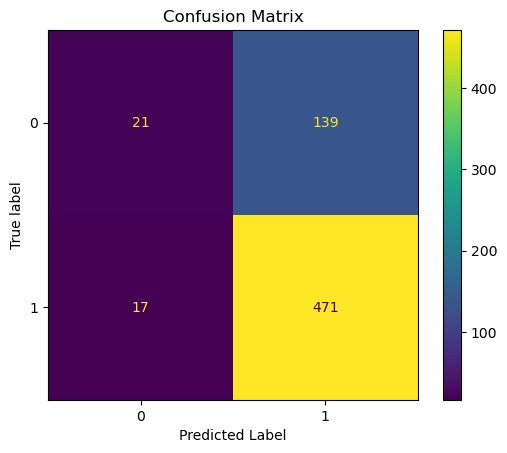

In [39]:
ConfusionMatrix = confusionMatrix(y_test2,y_pred2)
plt.savefig("LogisticRegressionModel1_confusionMatrix.jpeg")

---
**Logistic Regression Model 3: Stability Reached including Lab Data**    
Predictor Variables: Demographic, Exam, Chest X-ray, and Lab Data    
Target Variable: `Stability Reached`

In [40]:
x4 = np.array(df[['dem_age', 'dem_sex', 'exam_height', 'exam_weight', 'exam_hr',
       'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_mental',
       'lab_hematocrit', 'lab_hemoglobin', 'lab_wbc', 'lab_platelets',
       'lab_na', 'lab_k', 'lab_bun', 'lab_creatinine', 'lab_glucose',
       'lab_abg', 'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db',
       'cx_du', 'cx_cav', 'cx_pe']])

y4 = np.array(df['Stability_Reached'])

#Spliting the data into a training and testing portion
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4,
                                                   test_size = .2)

#Creating and fiting the model, then creating predictions with the model.
logisticModel_3 = LogisticRegression(max_iter=10000)
logisticModel_3.fit(x_train4, y_train4)
y_pred4 = logisticModel_3.predict(x_test4)

In [41]:
#Insights into the model
print(f"Model Intercept: {logisticModel_3.intercept_}\n")
print(f"Model Coefficients: \n{logisticModel_3.coef_}\n")
print(f"Model Score Value: {logisticModel_3.score(x_test4, y_test4)}")

Model Intercept: [0.26444518]

Model Coefficients: 
[[-2.17716921e-03 -3.21383114e-02 -2.23857824e-03  1.30797993e-03
  -1.02924277e-02 -4.49871227e-02  7.04926919e-03  9.23520814e-03
   8.41236846e-02 -9.33107491e-01  9.80238640e-03  4.15960701e-02
   2.12745095e-02 -8.61056809e-06 -5.16043717e-03 -2.16394380e-01
  -8.60870254e-03  1.00512819e-02 -1.16606388e-03  1.72582715e-02
  -8.16669577e-02 -1.37260849e-01 -1.09324694e-01 -2.28570615e-01
   1.09348787e-01  3.01007365e-01 -4.80434210e-01 -1.07496298e+00
  -1.96510867e-01]]

Model Score Value: 0.7854938271604939


In [42]:
print(classification_report(y_test4,y_pred4))

              precision    recall  f1-score   support

           0       0.62      0.22      0.32       152
           1       0.80      0.96      0.87       496

    accuracy                           0.79       648
   macro avg       0.71      0.59      0.60       648
weighted avg       0.76      0.79      0.74       648



<Figure size 500x500 with 0 Axes>

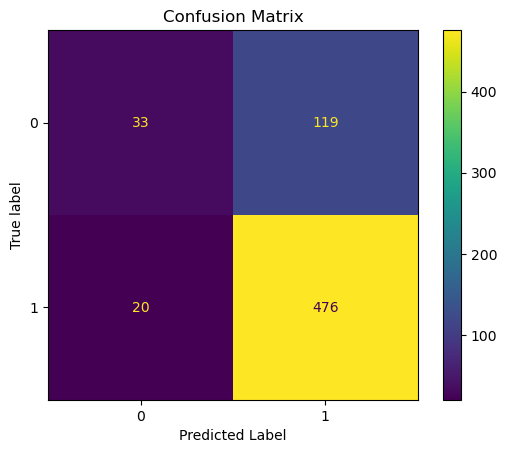

In [43]:
ConfusionMatrix = confusionMatrix(y_test4,y_pred4)
plt.savefig("LogisticRegressionModel3_confusionMatrix.jpeg")

----
**Logistic Regression Model 2: Early TCS**    
Predictor Variables: Demographic, Exam, and Chest X-ray Data    
Target Variable: `Early TCS`

In [44]:
x3 = np.array(df[['dem_age', 'dem_sex', 'exam_height', 'exam_weight', 'exam_hr',
       'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_mental',
       'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db',
       'cx_du', 'cx_cav', 'cx_pe']])

y3 = np.array(df['Early_TCS'])



x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3,
                                                   test_size = .20)



logisticModel_2 = LogisticRegression(max_iter=5000).fit(x_train3, y_train3)
y_pred3 = logisticModel_2.predict(x_test3)

In [45]:
#Model Insights
print(f"Intercept: {logisticModel_2.intercept_}")
print(f"Model Coefficients: \n{logisticModel_2.coef_}")
print(f"Score: {logisticModel_2.score(x_test3, y_test3)}")

Intercept: [0.49284835]
Model Coefficients: 
[[-1.26284305e-02  3.93066881e-02  2.42492116e-03  4.64389896e-03
  -8.75753140e-03 -2.69532374e-02  5.23059801e-03  5.32625061e-05
   1.10492993e-02 -8.56173880e-01 -9.50942822e-02 -1.82797993e-01
  -2.31106182e-01 -3.04004157e-01  4.84816401e-02 -5.43810222e-01
  -1.05286904e+00 -2.73299360e-01 -1.86795787e-01]]
Score: 0.6512345679012346


In [46]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       354
           1       0.67      0.46      0.54       294

    accuracy                           0.65       648
   macro avg       0.66      0.63      0.63       648
weighted avg       0.66      0.65      0.64       648



<Figure size 500x500 with 0 Axes>

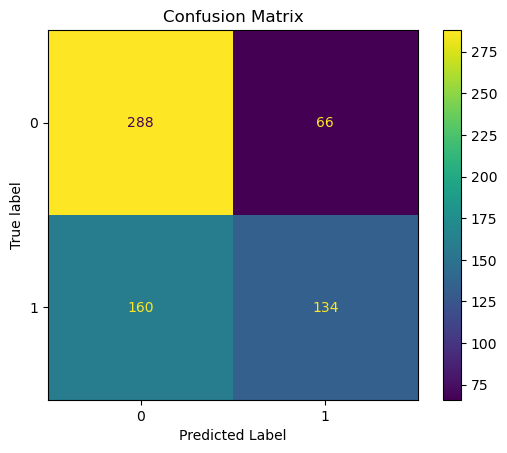

In [47]:
ConfusionMatrix = confusionMatrix(y_test3,y_pred3)
plt.savefig("LogisticRegressionModel2_confusionMatrix.jpeg")

---
**Logistic Regression Model 4: Early TCS with Lab Data**    
Predictor Variables: Demographic, Exam, Chest X-ray, and Lab Data     
Target Varaible: `Early_TCS`

In [48]:
x5 = np.array(df[['dem_age', 'dem_sex', 'exam_height', 'exam_weight', 'exam_hr',
       'exam_rr', 'exam_sbp', 'exam_dbp', 'exam_temp', 'exam_mental',
       'lab_hematocrit', 'lab_hemoglobin', 'lab_wbc', 'lab_platelets',
       'lab_na', 'lab_k', 'lab_bun', 'lab_creatinine', 'lab_glucose',
       'lab_abg', 'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll', 'cx_db',
       'cx_du', 'cx_cav', 'cx_pe']])

y5 = np.array(df['Early_TCS'])

#Spliting the data into a training and testing portion
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5,
                                                   test_size = .2)

#Creating and fiting the model, then creating predictions with the model.
logisticModel_4 = LogisticRegression(max_iter=10000)
logisticModel_4.fit(x_train5, y_train5)
y_pred5 = logisticModel_4.predict(x_test5)

In [49]:
#Insights into the model
print(f"Model Intercept: {logisticModel_4.intercept_}\n")
print(f"Model Coefficients: \n{logisticModel_4.coef_}\n")
print(f"Model Score: {logisticModel_4.score(x_test5, y_test5)}")

Model Intercept: [5.8200283]

Model Coefficients: 
[[-6.18158951e-03  1.77653805e-01  4.92306474e-03  4.30678781e-03
  -6.57301076e-03 -2.16229247e-02  7.42337736e-03 -4.21428423e-03
  -9.95027773e-02 -8.32573756e-01 -1.53350764e-03  4.17291563e-02
  -2.15821565e-04 -8.57862820e-05 -8.45161030e-03 -2.29123546e-01
  -1.27845837e-02 -2.39266964e-02 -1.07733077e-03 -1.69052797e-01
  -1.40757933e-01 -1.20405787e-01 -2.65009927e-01 -2.06523731e-01
   8.86335652e-02 -4.88268942e-01 -1.86569436e-01 -7.03363389e-02
  -2.27720066e-01]]

Model Score: 0.6388888888888888


In [50]:
print(classification_report(y_test5,y_pred5))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       377
           1       0.58      0.50      0.54       271

    accuracy                           0.64       648
   macro avg       0.63      0.62      0.62       648
weighted avg       0.63      0.64      0.63       648



<Figure size 500x500 with 0 Axes>

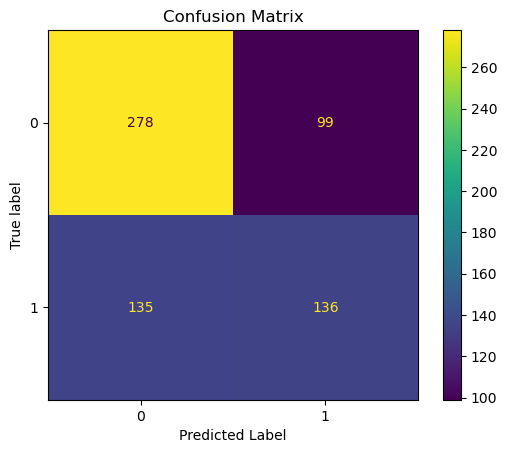

In [51]:
ConfusionMatrix = confusionMatrix(y_test5,y_pred5)
plt.savefig("LogisticRegressionModel4_confusionMatrix.jpeg")